### Why Neural Networks act as universal function aproximators? ###

We understand the idea of "fitting" a function to some data. First we get the intution by generating some data corresponding to a quadratic function and then manually fitting a function by tweaking its parameters using sliders. We then "automate" the fitting using gradient descend in pytorch. Importance of adding a non-linearity (ReLU) is studied. Finally, we study why adding multiple layers in the network improves the fit 

<h4>what is a neural network?</h4>
It is a mathematical function which takes an input vector (an array of numbers) and multiplies it with a set of parameters (another array of numbers) element-wise and sums up the result to generate an output (activation). This output is passed through a non-linearity (e.g ReLU - replace negetive numbers with zeros) to generate a final prediction. There could be multiple layers of these stacked one after the other to learn more complex functions

In [249]:
def f(x):
    return 5*(x**2)+ 4*x + 3

In [250]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

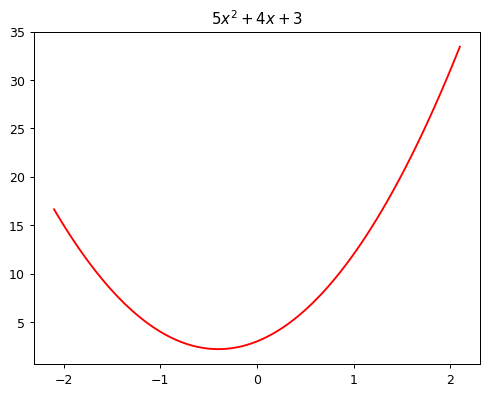

In [251]:
plot_function(f,title='$5x^2+4x+3$')

In [252]:
## define a generic form ax2+bx+c of a quadratc ##
def quadratic_function(a,b,c,x):
    return a*(x**2) + b*x + c

In [253]:
quadratic_function(3,2,1,0) ## evaluate quadratic at x=0

1

In [254]:
## create a specific quadratc with parameter values fixed ##
from functools import partial
def make_quadratc(a,b,c):
    return partial(quadratic_function,a,b,c)

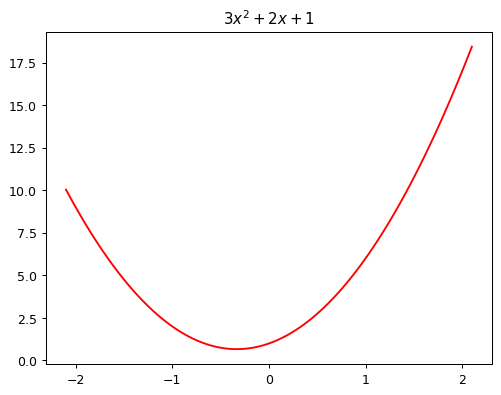

In [255]:
f1 = make_quadratc(3,2,1)
plot_function(f1,title="$3x^2+2x+1$")

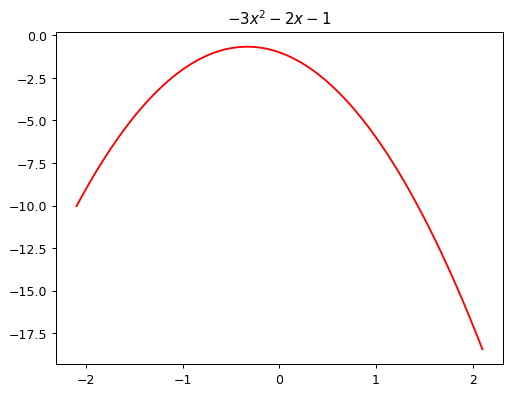

In [256]:
f2 = make_quadratc(-3,-2,-1)
plot_function(f2,title="$-3x^2-2x-1$")

In [257]:
## define a function to generate zero-centric gaussian noise as an array ##
## size of an array to be same as that of the input array passed ##
import numpy as np
def add_noise(x, scale):
    return np.random.normal(scale=scale,size=x.shape)

## define a function which adds multiplicative and additive noise to a set of random variables in array x ##

def add_multiplicative_additive_noise(x, mult, add):
    return x*(1.0+add_noise(x, mult)) + add_noise(x,add)

In [258]:
## generate sample data corresponding to function f1 and add some noise to it to simulate a real-world learning problem ##
np.random.seed(42)
x = torch.linspace(-2,2, steps=20)[:,None] ## return a 20x1 Tensor
y = add_multiplicative_additive_noise(f1(x), 0.25, 0.1)

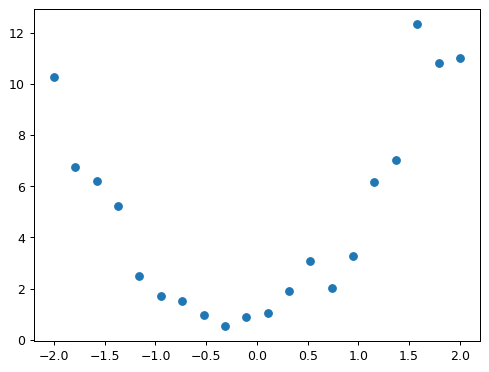

In [259]:
## plot the data to verify that it is a noisy quadratic ##
plt.scatter(x,y)

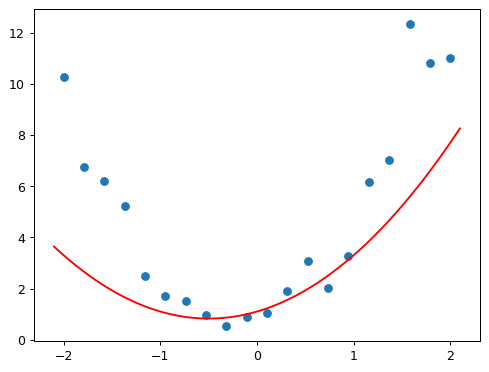

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [260]:
## define a function to visually tweak a quadratic fit on this data ##
@interact(a=1.1, b=1.1, c=1.1)
def tweak_quadratic(a,b,c):
    plt.scatter(x,y)
    fn = make_quadratc(a,b,c)
    plot_function(fn)

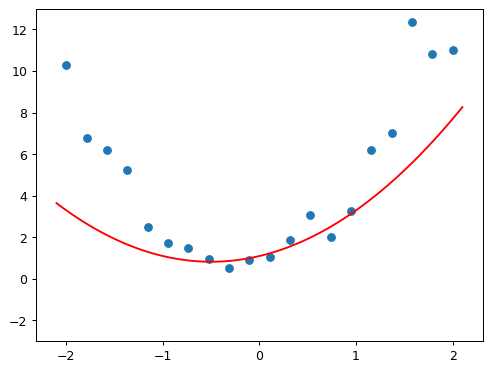

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [261]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(make_quadratc(a,b,c), ylim=(-3,13))

In [262]:
## define mean-absolute-error metric ##

def mae(predictions, actuals):
    return torch.mean(torch.abs(predictions - actuals))

In [263]:
mae(x,x)

tensor(0.)

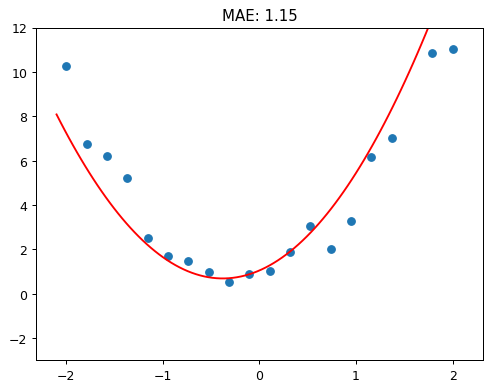

interactive(children=(FloatSlider(value=2.5, description='a', max=7.5, min=-2.5), FloatSlider(value=1.9, descr…

In [264]:
@interact(a=2.5, b=1.9, c=1.05)
def plot_quad(a, b, c):
    f = make_quadratc(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

In [265]:
## we want to find the gradient of the loss function and adjust the parameters a,b,c accordingly ##
def loss_function_of_quardatic(params):
    f = make_quadratc(*params)
    return mae(f(x),y)

In [266]:
loss_function_of_quardatic([2.9,2,1])

tensor(1.1356, dtype=torch.float64)

In [267]:
## initialize some params randomly ##
random_params = torch.tensor([1.1,1.1,1.1])
random_params.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [268]:
## iteratively reduce the loss and improve parameters
for i in range(15):
    loss = loss_function_of_quardatic(random_params)
    print(f'iteration={i},loss={loss}')
    loss.backward() 
    with torch.no_grad():
        random_params -= random_params.grad*0.01
        #print(random_params)
    

iteration=0,loss=2.147744666812952
iteration=1,loss=2.1243246846180512
iteration=2,loss=2.077484940765436
iteration=3,loss=2.0072251700144363
iteration=4,loss=1.918700477760387
iteration=5,loss=1.8134192810365886
iteration=6,loss=1.6936672137090891
iteration=7,loss=1.5556097374269693
iteration=8,loss=1.3999442996130742
iteration=9,loss=1.2426157476053992
iteration=10,loss=1.0972104676391665
iteration=11,loss=1.006458549893766
iteration=12,loss=0.9217728785642677
iteration=13,loss=0.8813708249660299
iteration=14,loss=0.9253009076041334


In [269]:
## we see loss monotonically decreasing ## => pytorch allows us to automatically tune parameters using gradient descernd ##

In [270]:
a,b,c = random_params.cpu().detach()

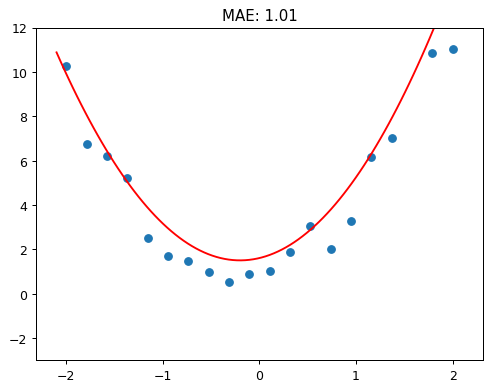

In [271]:
plot_quad(a,b,c) ## see that we have a good fit as expected

In [272]:
## the loss starts increasing after a while because the learning rate is constant - we jump over the minima ##
## to avoid this, practically frameworks decrease the learning rate with iteration using some "schedule"##

In [273]:
## by universal aproximation theorem, NN with sufficient number of parameters can aproximate any computable function ##
## some form of non-lineariry like ReLU is required in practice ##

def ReLU_activation(x):
    return torch.clip(x,0)

In [274]:
ReLU_activation(torch.tensor(-0.12))

tensor(0.)

In [275]:
def rectified_linear_unit(a,b,x):
    return ReLU_activation((a*x) + b)

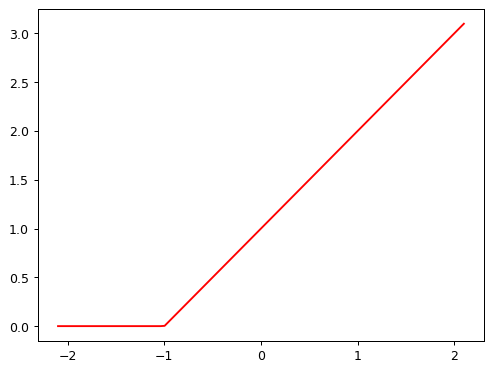

In [276]:
plot_function(partial(rectified_linear_unit,1,1))

### question: can a linear combination of two rectified linear units fit to our data which originally represents a quadratic function? ###
as it turns out, yes!

In [277]:
def double_relu(a1,b1,a2,b2,x):
    return rectified_linear_unit(a1,b1,x) + rectified_linear_unit(a2,b2,x)

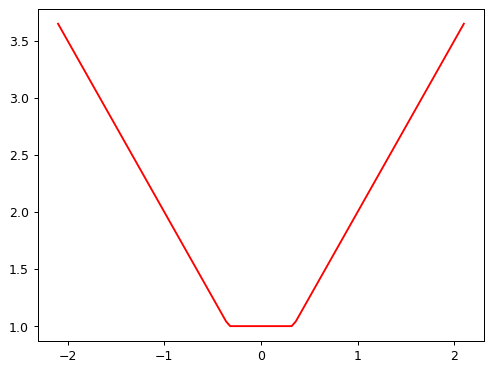

In [278]:
plot_function(partial(double_relu,1.5,0.5,-1.5,0.5))

In [279]:
## initialized parameters of double_reul function
random_params = torch.tensor([1.5,0.5,-1.5,0.5])
random_params.requires_grad_()

tensor([ 1.5000,  0.5000, -1.5000,  0.5000], requires_grad=True)

In [280]:
## we want to find the gradient of the loss function and adjust the parameters of rectified linear units accordingly ##
def make_double_relu(a1,b1,a2,b2):
    return partial(double_relu,a1,b1,a2,b2)
    
def loss_function_of_double_relu(params):
    f = make_double_relu(*params)
    return mae(f(x),y)


In [281]:
loss_function_of_double_relu([1.5,0.5,-1.5,0.5]) ## initial loss

tensor(2.7660, dtype=torch.float64)

In [282]:
for i in range(25):
    loss = loss_function_of_double_relu(random_params)
    loss.backward()
    with torch.no_grad():
        random_params-=random_params.grad*(5*np.exp(-i*0.25))
        print(f'iteration={i},loss={loss}')

iteration=0,loss=2.7660304642594986
iteration=1,loss=1.8767781624896223
iteration=2,loss=2.8728600656653027
iteration=3,loss=1.6454790557869743
iteration=4,loss=1.0437501702482797
iteration=5,loss=1.4865832484961754
iteration=6,loss=1.5362608981199368
iteration=7,loss=1.2121992778844937
iteration=8,loss=1.026805728657224
iteration=9,loss=1.2233613867716542
iteration=10,loss=1.360753873198042
iteration=11,loss=1.419719389288435
iteration=12,loss=1.414951446859846
iteration=13,loss=1.3717601807999709
iteration=14,loss=1.30737734159709
iteration=15,loss=1.2332913669037917
iteration=16,loss=1.1583500686803978
iteration=17,loss=1.09829407369291
iteration=18,loss=1.0499072619391245
iteration=19,loss=1.0232654877615732
iteration=20,loss=1.0006945200873179
iteration=21,loss=0.9868315955325107
iteration=22,loss=0.9826364844176922
iteration=23,loss=0.9897482245299969
iteration=24,loss=0.9950395434234295


In [283]:
## plot the fit using double relu
def plot_double_relu(params):
    a1,b1,a2,b2  = params.cpu().detach()
    f = make_double_relu(a1,b1,a2,b2)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

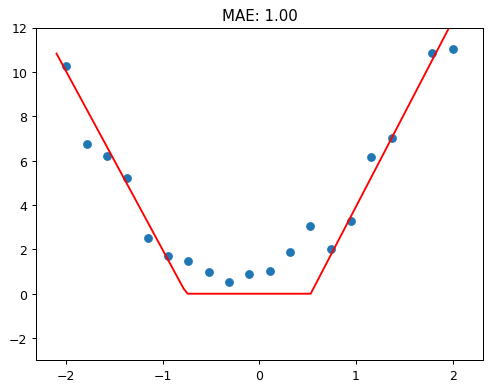

In [248]:
plot_double_relu(random_params)

we see that linear combination of just 2 rectified linear units aproximate the quadratic function well,
despite the individual functions are linear and attached with a ReLU based non-linearity